In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import pickle
import random
import matplotlib.colors as colors
import os

###
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
sns.set_style("whitegrid")
#plt.style.use('seaborn-paper')

In [2]:
def gather_loss(losses,label,threshold = None):
    loss_dict = {}
    acc_dict = {}
    data_dict = {}

    count = 0
    for k in losses:
        cumulative_data=0
        loss_list = []
        acc_list = []
        data_list = []
        epoch_acc_list = []
        epoch_loss_list = []
        epoch_data_list = []
        epoch_num = 1
        for j in os.listdir(k):
            if not j.endswith('.json'):
                continue
            with open(k + '/' + j ,'r') as f:
                a = json.load(f)
            for i in range(len(a)):
                if('loss' in a[i].keys()):
                    if a[i]['epoch'] <= epoch_num:
                        if('n_bits_to_transmit' in a[i].keys() and a[i]['split'] == 'train'):
                            if(threshold is not None):
                                if(a[i]['loss'] <= threshold):
                                    acc_list.append(a[i]['top1'])
                                    loss_list.append(a[i]['loss'])
                                    cumulative_data+= a[i]['n_bits_to_transmit']
                                    data_list.append(cumulative_data)
                            else:
                                acc_list.append(a[i]['top1'])
                                loss_list.append(a[i]['loss'])
                                cumulative_data+= a[i]['n_bits_to_transmit']
                                data_list.append(cumulative_data)                                  
                    else:
                        epoch_loss_list.append(np.mean(loss_list))
                        epoch_acc_list.append(np.mean(acc_list))
                        epoch_data_list.append(np.mean(data_list))
                        loss_list = []
                        acc_list = []
                        data_list = []
                        epoch_num += 1            
                else:
                    continue;
        loss_dict[label[count]] = epoch_loss_list
        acc_dict[label[count]] = epoch_acc_list
        data_dict[label[count]] = epoch_data_list
        count+=1
    return loss_dict,acc_dict,data_dict

In [3]:
#torus
n4 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/1621895491_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/'
n8 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/1621898435_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/'
n12 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/1621901298_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/'
n16 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/1621904289_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/'
n20 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/1621906948_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/'

#ring
r4 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621842329_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/'
r8 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621844888_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/'
r12 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621912769_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/'
r16 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621918058_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/'
r20 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621915467_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/'

FileNotFoundError: [Errno 2] No such file or directory: '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621842329_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/1'

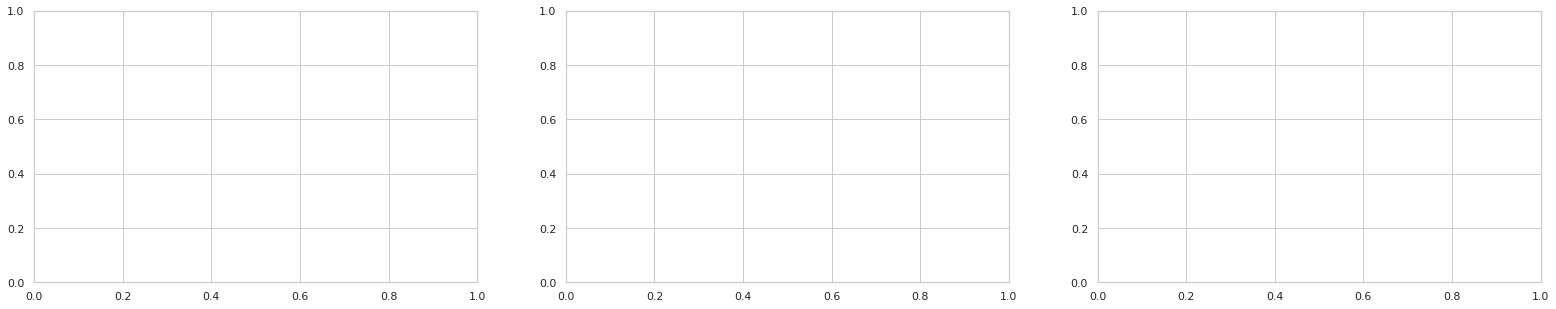

In [4]:
#4 nodes torus

count=0
l = [n4,n8,n12,n16,n20]
r = [r4,r8,r12,r16,r20]
for j in [4,8,12,16,20]:
    data_used = 0
    fig, ax = plt.subplots(1, 3,figsize=(27,5))
    for i in range(1,j):
        weird = r[count] + str(i)
        ld1,ad1,dd1 = gather_loss([weird],['weird'])

        ax[0].plot(ld1['weird'],label = 'Agent' + str(i))
        ax[1].plot(ad1['weird'])
        ax[2].plot(dd1['weird'],ld1['weird'])
        data_used+= dd1['weird'][-1]
        ax[0].legend()
    count+=1
    print("{} -> {} -> {} epochs".format(j,data_used,len(ld1['weird'])))

In [ ]:
weird = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622144497_lr-0.1_epochs-300_batchsize-128_num_mpi_process_40_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
        '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622145926_lr-0.1_epochs-300_batchsize-128_num_mpi_process_40_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0']

ld1,ad1,dd1 = gather_loss(weird,['torus','ring'])
fig, ax = plt.subplots(1, 3,figsize=(27,5))
ax[0].plot(ld1['ring'],label = 'ring')
ax[1].plot(ad1['ring'])
ax[0].plot(ld1['torus'],label = 'torus')
ax[1].plot(ad1['torus'])
ax[2].plot(dd1['ring'],ld1['ring'])
ax[2].plot(dd1['torus'],ld1['torus'])
ax[0].legend()


In [ ]:
ld1

In [ ]:
def gather_loss2(losses,label,threshold = None, mean = False):
    loss_dict = {}
    acc_dict = {}
    data_dict = {}
    for i in range(len(label)):
        loss_dict[label[i]] = {
                              'final_loss':[]}
        
        acc_dict[label[i]] = {
                              'final_acc':[]}
    loss_list = []
    acc_list = []
    
    count = 0
    for path in losses:
        final_agent_epoch_loss = np.zeros(300)
        final_agent_epoch_acc = np.zeros(300)
        for agent in range(0,len(os.listdir(path))-1):
            agent_epoch_loss = []
            agent_epoch_acc = []
            

            for file in os.listdir(os.path.join(path,str(agent))):
                if not file.endswith('.json'):
                    continue
                with open(os.path.join(path,str(agent),file) ,'r') as f:
                    a = json.load(f)
                    for i in range(len(a)):
                        if('loss' in a[i].keys()):
                            if(a[i]['split'] == 'test'): #recording loss value of the local model for every epoch
                                if(a[i]['type'] == 'local_model'):
                                    agent_epoch_loss.append(a[i]['loss'])
                                    agent_epoch_acc.append(a[i]['top1'])
            #from IPython import embed;embed()
            final_agent_epoch_loss.resize(len(agent_epoch_loss))
            final_agent_epoch_loss += np.array(agent_epoch_loss)
            
            final_agent_epoch_acc.resize(len(agent_epoch_acc))
            final_agent_epoch_acc += np.array(agent_epoch_acc)

        #from IPython import embed;embed()
        final_agent_epoch_loss /= len(os.listdir(path))-1
        final_agent_epoch_acc /= len(os.listdir(path))-1
        loss_dict[label[count]]['final_loss'] = final_agent_epoch_loss
        acc_dict[label[count]]['final_acc'] = final_agent_epoch_acc
            #from IPython import embed;embed()
        
        count+=1
#     if(mean is True):
#         for i in range(len(label)):
#             loss_dict[label[i]]['min_loss'] = np.mean(loss_dict[label[i]]['min_loss'])
#             loss_dict[label[i]]['final_loss'] = np.mean(loss_dict[label[i]]['final_loss'])
            
#             acc_dict[label[i]]['max_acc'] = np.mean(acc_dict[label[i]]['max_acc'])
#             acc_dict[label[i]]['final_acc'] = np.mean(acc_dict[label[i]]['final_acc'])
                            
    return loss_dict,acc_dict

## Figure 4

# Initialize Paths to each trial

In [ ]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return h

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(8,5))
plt.style.use('seaborn-paper')
sns.set_style("whitegrid")
n4 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1621992117_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622018245_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622043210_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622068363_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256'
     ]

n8 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1621994942_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622020811_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622045762_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622071166_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256'
     ]

n12 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1621997813_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622023220_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622048166_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622074058_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256'
      ]
       
n16 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622000952_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622026019_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622050942_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622076890_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256'
      ]

n20 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622003595_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622028727_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622053472_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622079471_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/'
      ]

n40 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622144497_lr-0.1_epochs-300_batchsize-128_num_mpi_process_40_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256',
        '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622157114_lr-0.1_epochs-300_batchsize-128_num_mpi_process_40_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256',
        '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622170347_lr-0.1_epochs-300_batchsize-128_num_mpi_process_40_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622238908_lr-0.1_epochs-300_batchsize-128_num_mpi_process_40_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256'
]
#ring
r4 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1621979891_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622005845_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622030978_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622055739_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256'
     ]
      
r8 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1621982434_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622008391_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622033500_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622058470_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/'
     ]

r12 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1621984779_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622010747_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622035853_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622060932_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256'
      ]

r16 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1621987447_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622013453_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622038533_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622063719_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/'
      ]

r20 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1621990035_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622016076_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622041153_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622066254_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256'
      ]
r40 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622145926_lr-0.1_epochs-300_batchsize-128_num_mpi_process_40_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622158600_lr-0.1_epochs-300_batchsize-128_num_mpi_process_40_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622171979_lr-0.1_epochs-300_batchsize-128_num_mpi_process_40_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622240377_lr-0.1_epochs-300_batchsize-128_num_mpi_process_40_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256']

############
#Initialize lists

min_loss_t = np.array([0.0,0.0,0.0,0.0,0.0,0.0])
max_acc_t = np.array([0.0,0.0,0.0,0.0,0.0,0.0])
final_loss_t = np.array([0.0,0.0,0.0,0.0,0.0,0.0])
final_acc_t = np.array([0.0,0.0,0.0,0.0,0.0,0.0])

min_loss_r = np.array([0.0,0.0,0.0,0.0,0.0,0.0])
max_acc_r = np.array([0.0,0.0,0.0,0.0,0.0,0.0])
final_loss_r = np.array([0.0,0.0,0.0,0.0,0.0,0.0])
final_acc_r = np.array([0.0,0.0,0.0,0.0,0.0,0.0])

err_min_loss_t = [[],[],[],[],[],[]]
err_max_acc_t = [[],[],[],[],[],[]]
err_final_loss_t = [[],[],[],[],[],[]]
err_final_acc_t = [[],[],[],[],[],[]]

err_min_loss_r = [[],[],[],[],[],[]]
err_max_acc_r = [[],[],[],[],[],[]]
err_final_loss_r = [[],[],[],[],[],[]]
err_final_acc_r = [[],[],[],[],[],[]]
############
trials = np.min([len(n4),len(n8),len(n12),len(n16),len(n20),len(n40),len(r4),len(r8),len(r12),len(r16),len(r20),len(r40)])
for i in range(trials):
# for i in range(1):#TODO POPULAE WITH N=40
    temp = [n4[i],n8[i],n12[i],n16[i],n20[i],n40[i],r4[i],r8[i],r12[i],r16[i],r20[i],r40[i]]
    labels = ['n4t', 'n8t', 'n12t', 'n16t', 'n20t', 'n40t','n4r','n8r','n12r', 'n16r', 'n20r','n40r']
    loss_dict,acc_dict = gather_loss2(temp,labels,threshold=2.0)

    # for i in range(len(labels)):
    #     acc_dict[labels[i]] = [x for x in acc_dict[labels[i]] if not np.isnan(x)]
    #     loss_dict[labels[i]] = [x for x in loss_dict[labels[i]] if not np.isnan(x)]

    stopat = len(loss_dict['n20t']['final_loss'])

    
    min_loss_t += np.array([min(loss_dict['n40t']['final_loss'][:stopat]), min(loss_dict['n20t']['final_loss'][:stopat]), min(loss_dict['n16t']['final_loss'][:stopat]), min(loss_dict['n12t']['final_loss'][:stopat]),
               min(loss_dict['n8t']['final_loss'][:stopat]), min(loss_dict['n4t']['final_loss'][:stopat])][::-1])
    temp1 = np.array([min(loss_dict['n40t']['final_loss'][:stopat]), min(loss_dict['n20t']['final_loss'][:stopat]), min(loss_dict['n16t']['final_loss'][:stopat]), min(loss_dict['n12t']['final_loss'][:stopat]),
               min(loss_dict['n8t']['final_loss'][:stopat]), min(loss_dict['n4t']['final_loss'][:stopat])][::-1])
        
    max_acc_t += np.array([max(acc_dict['n40t']['final_acc'][:stopat]), max(acc_dict['n20t']['final_acc'][:stopat]), max(acc_dict['n16t']['final_acc'][:stopat]), max(acc_dict['n12t']['final_acc'][:stopat]), max(acc_dict['n8t']['final_acc'][:stopat]),
               max(acc_dict['n4t']['final_acc'][:stopat])][::-1])
    temp2 = np.array([max(acc_dict['n40t']['final_acc'][:stopat]), max(acc_dict['n20t']['final_acc'][:stopat]), max(acc_dict['n16t']['final_acc'][:stopat]), max(acc_dict['n12t']['final_acc'][:stopat]), max(acc_dict['n8t']['final_acc'][:stopat]),
               max(acc_dict['n4t']['final_acc'][:stopat])][::-1])
    
    
    final_loss_t += np.array([loss_dict['n40t']['final_loss'][:stopat][-1], loss_dict['n20t']['final_loss'][:stopat][-1], loss_dict['n16t']['final_loss'][:stopat][-1], loss_dict['n12t']['final_loss'][:stopat][-1],
               loss_dict['n8t']['final_loss'][:stopat][-1], loss_dict['n4t']['final_loss'][:stopat][-1]][::-1])
    temp3 = np.array([loss_dict['n40t']['final_loss'][:stopat][-1], loss_dict['n20t']['final_loss'][:stopat][-1], loss_dict['n16t']['final_loss'][:stopat][-1], loss_dict['n12t']['final_loss'][:stopat][-1],
               loss_dict['n8t']['final_loss'][:stopat][-1], loss_dict['n4t']['final_loss'][:stopat][-1]][::-1])

    final_acc_t += np.array([acc_dict['n40t']['final_acc'][:stopat][-1], acc_dict['n20t']['final_acc'][:stopat][-1], acc_dict['n16t']['final_acc'][:stopat][-1], acc_dict['n12t']['final_acc'][:stopat][-1], acc_dict['n8t']['final_acc'][:stopat][-1],
               acc_dict['n4t']['final_acc'][:stopat][-1]][::-1])
    temp4 = np.array([acc_dict['n40t']['final_acc'][:stopat][-1], acc_dict['n20t']['final_acc'][:stopat][-1], acc_dict['n16t']['final_acc'][:stopat][-1], acc_dict['n12t']['final_acc'][:stopat][-1], acc_dict['n8t']['final_acc'][:stopat][-1],
               acc_dict['n4t']['final_acc'][:stopat][-1]][::-1])

    ###########
    min_loss_r += np.array([min(loss_dict['n40r']['final_loss'][:stopat]), min(loss_dict['n20r']['final_loss'][:stopat]), min(loss_dict['n16r']['final_loss'][:stopat]), min(loss_dict['n12r']['final_loss'][:stopat]),
               min(loss_dict['n8r']['final_loss'][:stopat]), min(loss_dict['n4r']['final_loss'][:stopat])][::-1])
    temp5 = np.array([min(loss_dict['n40r']['final_loss'][:stopat]), min(loss_dict['n20r']['final_loss'][:stopat]), min(loss_dict['n16r']['final_loss'][:stopat]), min(loss_dict['n12r']['final_loss'][:stopat]),
               min(loss_dict['n8r']['final_loss'][:stopat]), min(loss_dict['n4r']['final_loss'][:stopat])][::-1])

    max_acc_r += np.array([max(acc_dict['n40r']['final_acc'][:stopat]), max(acc_dict['n20r']['final_acc'][:stopat]), max(acc_dict['n16r']['final_acc'][:stopat]),  max(acc_dict['n12r']['final_acc'][:stopat]), max(acc_dict['n8t']['final_acc'][:stopat]),
               max(acc_dict['n4r']['final_acc'][:stopat])][::-1])
    temp6 = np.array([max(acc_dict['n40r']['final_acc'][:stopat]), max(acc_dict['n20r']['final_acc'][:stopat]), max(acc_dict['n16r']['final_acc'][:stopat]),  max(acc_dict['n12r']['final_acc'][:stopat]), max(acc_dict['n8t']['final_acc'][:stopat]),
               max(acc_dict['n4r']['final_acc'][:stopat])][::-1])

    final_loss_r += np.array([loss_dict['n40r']['final_loss'][:stopat][-1], loss_dict['n20r']['final_loss'][:stopat][-1], loss_dict['n16r']['final_loss'][:stopat][-1], loss_dict['n12r']['final_loss'][:stopat][-1],
               loss_dict['n8r']['final_loss'][:stopat][-1], loss_dict['n4r']['final_loss'][:stopat][-1]][::-1])
    temp7 = np.array([loss_dict['n40r']['final_loss'][:stopat][-1], loss_dict['n20r']['final_loss'][:stopat][-1], loss_dict['n16r']['final_loss'][:stopat][-1], loss_dict['n12r']['final_loss'][:stopat][-1],
               loss_dict['n8r']['final_loss'][:stopat][-1], loss_dict['n4r']['final_loss'][:stopat][-1]][::-1])

    final_acc_r += np.array([acc_dict['n40r']['final_acc'][:stopat][-1], acc_dict['n20r']['final_acc'][:stopat][-1], acc_dict['n16r']['final_acc'][:stopat][-1], acc_dict['n12r']['final_acc'][:stopat][-1], acc_dict['n8r']['final_acc'][:stopat][-1],
               acc_dict['n4r']['final_acc'][:stopat][-1]][::-1])
    temp8 = np.array([acc_dict['n40r']['final_acc'][:stopat][-1], acc_dict['n20r']['final_acc'][:stopat][-1], acc_dict['n16r']['final_acc'][:stopat][-1], acc_dict['n12r']['final_acc'][:stopat][-1], acc_dict['n8r']['final_acc'][:stopat][-1],
               acc_dict['n4r']['final_acc'][:stopat][-1]][::-1])
    
    for k in range(0,6): #adding data for error bars
        err_min_loss_t[k].append(temp1[k])
        err_max_acc_t[k].append(temp2[k])
        err_final_loss_t[k].append(temp3[k])
        err_final_acc_t[k].append(temp4[k])
        
        err_min_loss_r[k].append(temp5[k])
        err_max_acc_r[k].append(temp6[k])
        err_final_loss_r[k].append(temp7[k])
        err_final_acc_r[k].append(temp8[k])

min_loss_t /= float(trials)
max_acc_t /= float(trials)
final_loss_t /= float(trials)
final_acc_t /= float(trials)

min_loss_r /= float(trials)
max_acc_r /= float(trials)
final_loss_r /= float(trials)
final_acc_r /= float(trials)
    
nodes = [4,8,12,16,20,40]
    
# ax[1].plot(nodes, max_acc_t,'-',color='crimson', markevery=True, marker = 'o',markersize=4,label = r'Torus' "\n" r'$\rho \in (0.67, 0.5, 0.4, 0.4, 0.27, 0.11$)')
# err_max_acc_t = [mean_confidence_interval(err_max_acc_t[l]) for l in range(len(err_max_acc_t))]
# (_, caps, _) = ax[1].errorbar(nodes, max_acc_t, yerr=err_max_acc_t, capsize=5, elinewidth=2, color='crimson')

# for cap in caps:
#     cap.set_markeredgewidth(1)
#     cap.set_color('crimson')
    
    
# ax[1].plot(nodes, max_acc_r,'-',color='rebeccapurple', markevery=True, marker = 'o',markersize=4,label = r'Ring' "\n" r'$\rho \in (0.67, 0.19, 0.09, 0.05, 0.032, 0.0082$)')
# ax[1].set_xticks([4,8,12,16,20,40])
# err_max_acc_r = [mean_confidence_interval(err_max_acc_r[l]) for l in range(len(err_max_acc_r))]
# (_, caps, _) = ax[1].errorbar(nodes, max_acc_r, yerr=err_max_acc_r, capsize=5, elinewidth=2,color='rebeccapurple')

# for cap in caps:
#     cap.set_markeredgewidth(1)
#     cap.set_color('rebeccapurple')
    
    



In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(8,5))
plt.style.use('seaborn-paper')
sns.set_style("whitegrid")

ax.plot(nodes[:-1], min_loss_t[:-1], color='crimson', markevery=True, marker = 'o',markersize=4,label = r'Torus' "\n" r'$\rho \in (0.67, 0.5, 0.4, 0.4, 0.27, 0.11$)')
ax.plot(nodes[-2:], min_loss_t[-2:], color='crimson', linestyle = '-', markevery=True, marker = 'o',markersize=4)
err_min_loss_t1 = [mean_confidence_interval(err_min_loss_t[l]) for l in range(len(err_min_loss_t))]
(_, caps, _) = ax.errorbar(nodes[:-1], min_loss_t[:-1], yerr=err_min_loss_t1[:-1], capsize=5, elinewidth=2,color='crimson')

for cap in caps:
    cap.set_markeredgewidth(1)
    cap.set_color('crimson')
    
(_, caps, _) = ax.errorbar(nodes[-1], min_loss_t[-1], yerr=err_min_loss_t1[-1], capsize=5, elinewidth=2,color='crimson')

for cap in caps:
    cap.set_markeredgewidth(1)
    cap.set_color('crimson')
    
    
ax.plot(nodes[:-1], min_loss_r[:-1],linestyle='-',color='rebeccapurple', markevery=True, marker = 'o',markersize=4,label = r'Ring' "\n" r'$\rho \in (0.67, 0.19, 0.09, 0.05, 0.032, 0.0082$)')
ax.plot(nodes[-2:], min_loss_r[-2:],linestyle='-',color='rebeccapurple', markevery=True, marker = 'o',markersize=4)
ax.set_xticks([4,8,12,16,20,40])
err_min_loss_r1 = [mean_confidence_interval(err_min_loss_r[l]) for l in range(len(err_min_loss_r))]
(_, caps, _) = ax.errorbar(nodes[:-1], min_loss_r[:-1], yerr=err_min_loss_r1[:-1], capsize=5, elinewidth=2, color='rebeccapurple')

ax.grid(True, linestyle='--')
#ax[1].grid(True, linestyle='--')
for cap in caps:
    cap.set_markeredgewidth(1)
    cap.set_color('rebeccapurple')
    
(_, caps, _) = ax.errorbar(nodes[-1], min_loss_r[-1], yerr=err_min_loss_r1[-1], capsize=5, elinewidth=2, color='rebeccapurple')    
for cap in caps:
    cap.set_markeredgewidth(1)
    cap.set_color('rebeccapurple')    
    
ax.legend(prop={'size': 13},
          ncol=1, fancybox=True, shadow=True)


#legend = ax[1].legend(prop={'size': 13},
          #ncol=1, fancybox=True, shadow=True)

ax.set_xlabel('Number of Nodes',fontsize=10)
#ax[1].set_xlabel('Number of Nodes',fontsize=10)
ax.set_ylabel('Training Loss',fontsize=10)
#ax[1].set_ylabel('Test Top-1 Accuracy',fontsize=10)
plt.savefig('topology.pdf')

In [ ]:
fig, ax = plt.subplots(1, 2,figsize=(18,5))
plt.style.use('seaborn-paper')
sns.set_style("whitegrid")
n4 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621992117_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622018245_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622043210_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622068363_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256'
     ]

n8 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621994942_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622020811_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622045762_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622071166_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256'
     ]

n12 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621997813_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622023220_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622048166_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622074058_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256'
      ]
       
n16 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622000952_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622026019_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622050942_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622076890_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256'
      ]

n20 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622003595_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622028727_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622053472_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622079471_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/'
      ]

#ring
r4 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621979891_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622005845_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622030978_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622055739_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256'
     ]
      
r8 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621982434_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622008391_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622033500_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622058470_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/'
     ]

r12 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621984779_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622010747_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622035853_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622060932_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256'
      ]

r16 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621987447_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622013453_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622038533_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622063719_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/'
      ]

r20 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1621990035_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622016076_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622041153_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622066254_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256'
      ]


############
#Initialize lists

min_loss_t = np.array([0.0,0.0,0.0,0.0,0.0])
max_acc_t = np.array([0.0,0.0,0.0,0.0,0.0])
final_loss_t = np.array([0.0,0.0,0.0,0.0,0.0])
final_acc_t = np.array([0.0,0.0,0.0,0.0,0.0])

min_loss_r = np.array([0.0,0.0,0.0,0.0,0.0])
max_acc_r = np.array([0.0,0.0,0.0,0.0,0.0])
final_loss_r = np.array([0.0,0.0,0.0,0.0,0.0])
final_acc_r = np.array([0.0,0.0,0.0,0.0,0.0])

err_min_loss_t = [[],[],[],[],[]]
err_max_acc_t = [[],[],[],[],[]]
err_final_loss_t = [[],[],[],[],[]]
err_final_acc_t = [[],[],[],[],[]]

err_min_loss_r = [[],[],[],[],[]]
err_max_acc_r = [[],[],[],[],[]]
err_final_loss_r = [[],[],[],[],[]]
err_final_acc_r = [[],[],[],[],[]]
############
trials = np.min([len(n4),len(n8),len(n12),len(n16),len(n20),len(r4),len(r8),len(r12),len(r16),len(r20)])
for i in range(trials):
# for i in range(1):
    temp = [n4[i],n8[i],n12[i],n16[i],n20[i],r4[i],r8[i],r12[i],r16[i],r20[i]]
    labels = ['n4t', 'n8t', 'n12t', 'n16t', 'n20t', 'n4r','n8r','n12r', 'n16r', 'n20r']
    loss_dict,acc_dict = gather_loss2(temp,labels,threshold=2.0)

    # for i in range(len(labels)):
    #     acc_dict[labels[i]] = [x for x in acc_dict[labels[i]] if not np.isnan(x)]
    #     loss_dict[labels[i]] = [x for x in loss_dict[labels[i]] if not np.isnan(x)]

    stopat = len(loss_dict['n20t']['final_loss'])

    
    min_loss_t = np.array([min(loss_dict['n20t']['final_loss'][:stopat]), min(loss_dict['n16t']['final_loss'][:stopat]), min(loss_dict['n12t']['final_loss'][:stopat]),
               min(loss_dict['n8t']['final_loss'][:stopat]), min(loss_dict['n4t']['final_loss'][:stopat])][::-1])
    temp1 = np.array([min(loss_dict['n20t']['final_loss'][:stopat]), min(loss_dict['n16t']['final_loss'][:stopat]), min(loss_dict['n12t']['final_loss'][:stopat]),
               min(loss_dict['n8t']['final_loss'][:stopat]), min(loss_dict['n4t']['final_loss'][:stopat])][::-1])
        
    max_acc_t = np.array([max(acc_dict['n20t']['final_acc'][:stopat]), max(acc_dict['n16t']['final_acc'][:stopat]), max(acc_dict['n12t']['final_acc'][:stopat]), max(acc_dict['n8t']['final_acc'][:stopat]),
               max(acc_dict['n4t']['final_acc'][:stopat])][::-1])
    temp2 = np.array([max(acc_dict['n20t']['final_acc'][:stopat]), max(acc_dict['n16t']['final_acc'][:stopat]), max(acc_dict['n12t']['final_acc'][:stopat]), max(acc_dict['n8t']['final_acc'][:stopat]),
               max(acc_dict['n4t']['final_acc'][:stopat])][::-1])
    
    
    final_loss_t = np.array([loss_dict['n20t']['final_loss'][:stopat][-1], loss_dict['n16t']['final_loss'][:stopat][-1], loss_dict['n12t']['final_loss'][:stopat][-1],
               loss_dict['n8t']['final_loss'][:stopat][-1], loss_dict['n4t']['final_loss'][:stopat][-1]][::-1])
    temp3 = np.array([loss_dict['n20t']['final_loss'][:stopat][-1], loss_dict['n16t']['final_loss'][:stopat][-1], loss_dict['n12t']['final_loss'][:stopat][-1],
               loss_dict['n8t']['final_loss'][:stopat][-1], loss_dict['n4t']['final_loss'][:stopat][-1]][::-1])

    final_acc_t = np.array([acc_dict['n20t']['final_acc'][:stopat][-1], acc_dict['n16t']['final_acc'][:stopat][-1], acc_dict['n12t']['final_acc'][:stopat][-1], acc_dict['n8t']['final_acc'][:stopat][-1],
               acc_dict['n4t']['final_acc'][:stopat][-1]][::-1])
    temp4 = np.array([acc_dict['n20t']['final_acc'][:stopat][-1], acc_dict['n16t']['final_acc'][:stopat][-1], acc_dict['n12t']['final_acc'][:stopat][-1], acc_dict['n8t']['final_acc'][:stopat][-1],
               acc_dict['n4t']['final_acc'][:stopat][-1]][::-1])

    ###########
    min_loss_r = np.array([min(loss_dict['n20r']['final_loss'][:stopat]), min(loss_dict['n16r']['final_loss'][:stopat]), min(loss_dict['n12r']['final_loss'][:stopat]),
               min(loss_dict['n8r']['final_loss'][:stopat]), min(loss_dict['n4r']['final_loss'][:stopat])][::-1])
    temp5 = np.array([min(loss_dict['n20r']['final_loss'][:stopat]), min(loss_dict['n16r']['final_loss'][:stopat]), min(loss_dict['n12r']['final_loss'][:stopat]),
               min(loss_dict['n8r']['final_loss'][:stopat]), min(loss_dict['n4r']['final_loss'][:stopat])][::-1])

    max_acc_r = np.array([max(acc_dict['n20r']['final_acc'][:stopat]), max(acc_dict['n16r']['final_acc'][:stopat]),  max(acc_dict['n12r']['final_acc'][:stopat]), max(acc_dict['n8t']['final_acc'][:stopat]),
               max(acc_dict['n4r']['final_acc'][:stopat])][::-1])
    temp6 = np.array([max(acc_dict['n20r']['final_acc'][:stopat]), max(acc_dict['n16r']['final_acc'][:stopat]),  max(acc_dict['n12r']['final_acc'][:stopat]), max(acc_dict['n8t']['final_acc'][:stopat]),
               max(acc_dict['n4r']['final_acc'][:stopat])][::-1])

    final_loss_r = np.array([loss_dict['n20r']['final_loss'][:stopat][-1], loss_dict['n16r']['final_loss'][:stopat][-1], loss_dict['n12r']['final_loss'][:stopat][-1],
               loss_dict['n8r']['final_loss'][:stopat][-1], loss_dict['n4r']['final_loss'][:stopat][-1]][::-1])
    temp7 = np.array([loss_dict['n20r']['final_loss'][:stopat][-1], loss_dict['n16r']['final_loss'][:stopat][-1], loss_dict['n12r']['final_loss'][:stopat][-1],
               loss_dict['n8r']['final_loss'][:stopat][-1], loss_dict['n4r']['final_loss'][:stopat][-1]][::-1])

    final_acc_r = np.array([acc_dict['n20r']['final_acc'][:stopat][-1], acc_dict['n16r']['final_acc'][:stopat][-1], acc_dict['n12r']['final_acc'][:stopat][-1], acc_dict['n8r']['final_acc'][:stopat][-1],
               acc_dict['n4r']['final_acc'][:stopat][-1]][::-1])
    temp8 = np.array([acc_dict['n20r']['final_acc'][:stopat][-1], acc_dict['n16r']['final_acc'][:stopat][-1], acc_dict['n12r']['final_acc'][:stopat][-1], acc_dict['n8r']['final_acc'][:stopat][-1],
               acc_dict['n4r']['final_acc'][:stopat][-1]][::-1])
    

# min_loss_t /= float(trials)
# max_acc_t /= float(trials)
# final_loss_t /= float(trials)
# final_acc_t /= float(trials)

# min_loss_r /= float(trials)
# max_acc_r /= float(trials)
# final_loss_r /= float(trials)
# final_acc_r /= float(trials)
    
    nodes = [4,8,12,16,20]

    ax[1].plot(nodes, max_acc_t,'-',color='crimson', markevery=True, marker = 'o',markersize=4,label = '~Torus Topology')



    ax[1].plot(nodes, max_acc_r,'-',color='rebeccapurple', markevery=True, marker = 'o',markersize=4,label = '~Ring Topology')
    ax[1].set_xticks([4,8,12,16,20])




    ax[0].plot(nodes, min_loss_t,'-',color='crimson', markevery=True, marker = 'o',markersize=4,label = '~Torus Topology')



    ax[0].plot(nodes, min_loss_r,'-',color='rebeccapurple', markevery=True, marker = 'o',markersize=4,label = '~Ring Topology')
    ax[0].set_xticks([4,8,12,16,20])



    ax[0].legend(prop={'size': 9},
              ncol=1, fancybox=True, shadow=True)
    ax[1].legend(prop={'size': 9},
              ncol=1, fancybox=True, shadow=True)
    ax[0].set_xlabel('Number of Nodes',fontsize=10)
    ax[1].set_xlabel('Number of Nodes',fontsize=10)
    ax[0].set_ylabel('Training Loss',fontsize=10)
    ax[1].set_ylabel('Top-1 Accuracy',fontsize=10)

# Draw Topology and calculate spectral gap


In [34]:
import networkx
import scipy as sp
def show_graph_with_labels(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix > 0)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    all_rows = range(0, adjacency_matrix.shape[0])
    for n in all_rows:
        gr.add_node(n)
    gr.add_edges_from(edges)
    labels = dict(zip(gr, mylabels))
    nx.draw(gr, node_size=900, labels=labels, with_labels=True)
    plt.show()

def define_graph(n_mpi_process, topology):
    
    if(topology == 'torus'):
        # get proper _width and _height.
        m = int(np.sqrt(n_mpi_process))
        while True:
            if n_mpi_process % m == 0:
                n = int(n_mpi_process / m)
                break
            else:
                m -= 1

        # define the graph.
        graph = networkx.generators.lattice.grid_2d_graph(m, n, periodic=True)

        # get the mixing matrix.
        mixing_matrix = networkx.adjacency_matrix(graph).toarray()
        for i in range(0, mixing_matrix.shape[0]):
            mixing_matrix[i][i] = 1
        rows = (mixing_matrix != 0).sum(1)
        mixing_matrix = mixing_matrix/rows[0]

#         print("*************************************")
#         print(mixing_matrix)
#         print("*************************************")
        return(np.sort(np.linalg.eigvals(mixing_matrix))[::-1][0] - np.sort(np.linalg.eigvals(mixing_matrix))[::-1][1])
        show_graph_with_labels(mixing_matrix, list(range(n_mpi_process)))
    if(topology == 'ring'):
        assert n_mpi_process > 2

        # create ring matrix
        diag_rows = np.array(
            [
                [1 / 3 for _ in range(n_mpi_process)],
                [1 / 3 for _ in range(n_mpi_process)],
                [1 / 3 for _ in range(n_mpi_process)],
            ]
        )
        positions = [-1, 0, 1]
        mixing_matrix = sp.sparse.spdiags(diag_rows, positions, n_mpi_process, n_mpi_process).tolil()

        mixing_matrix[0, n_mpi_process - 1] = 1 / 3
        mixing_matrix[n_mpi_process - 1, 0] = 1 / 3
        mixing_matrix = mixing_matrix.tocsr()
        mixing_matrix = mixing_matrix.toarray()
#         print("*************************************")
#         print(mixing_matrix)
#         print("*************************************")
        return(np.sort(np.linalg.eigvals(mixing_matrix))[::-1][0] - np.sort(np.linalg.eigvals(mixing_matrix))[::-1][1])
        show_graph_with_labels(mixing_matrix, list(range(n_mpi_process)))
        

3.130434782608696
-1.0304347826086957


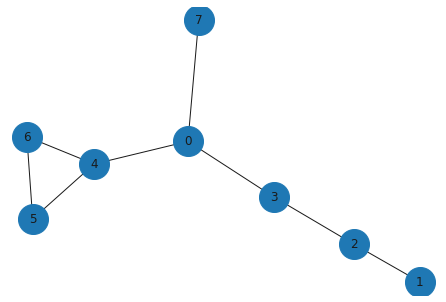

In [35]:
import networkx as nx
sw = nx.watts_strogatz_graph(8,2,0.3)
print(nx.sigma(sw))
print(nx.omega(sw))
show_graph_with_labels(nx.to_numpy_matrix(sw),list(range(8)))

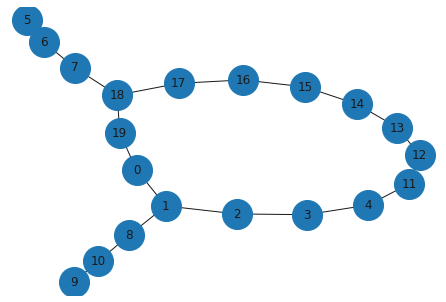

In [43]:
graph = nx.generators.random_graphs.connected_watts_strogatz_graph(20, 2, 0.2)
show_graph_with_labels(nx.to_numpy_matrix(graph),list(range(20)))
mixing_matrix = networkx.adjacency_matrix(graph).toarray().astype(np.float)

In [49]:
num_workers = 8
k = 2
p = 0.2
graph = networkx.generators.random_graphs.connected_watts_strogatz_graph(
            num_workers, k, p
        )

        # get the mixing matrix.
mixing_matrix = networkx.adjacency_matrix(graph).toarray().astype(np.float)

degrees = mixing_matrix.sum(axis=1) + 1
for node in np.argsort(degrees)[::-1]:
    mixing_matrix[:, node][mixing_matrix[:, node] == 1] = 1.0 / degrees[node]
    mixing_matrix[node, :][mixing_matrix[node, :] == 1] = 1.0 / degrees[node]
    mixing_matrix[node, node] = (
        1 - np.sum(mixing_matrix[node, :]) + mixing_matrix[node, node]
    )

In [47]:
eye = np.eye(num_workers)
W = eye + np.roll(eye, 1, 1) + np.roll(eye, -1, 1)
mixing_matrix = W / np.sum(W, axis=1, keepdims=True)


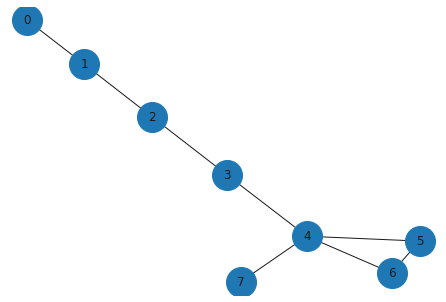

In [52]:
mixing_matrix
show_graph_with_labels(mixing_matrix,list(range(8)))

In [38]:
networkx.adjacency_matrix(sw).toarray()

array([[0, 0, 0, 1, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [ ]:
mixing_matrix = np.array([[0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 1, 0]])

In [ ]:
mixing_matrix


# Calculating iterations required to convergence for various topologies with increasing number of workers

In [14]:
def gather_loss(losses,label,threshold = None):
    loss_dict = {}
    acc_dict = {}
    data_dict = {}
    epoch_dict = {}

    count = 0
    for k in losses:
        cumulative_data=0
        loss_list = []
        acc_list = []
        data_list = []
        epoch_list = []
        epoch_num = 1
        for j in os.listdir(k):
            if not j.endswith('.json'):
                continue
            with open(k + '/' + j ,'r') as f:
                a = json.load(f)
            for i in range(len(a)):
                if('loss' in a[i].keys()):
                        if('n_bits_to_transmit' in a[i].keys() and a[i]['split'] == 'train'):

                            loss_list.append(a[i]['loss'])
                            epoch_list.append(a[i]['epoch'])
                            cumulative_data+= a[i]['n_bits_to_transmit']
                            data_list.append(cumulative_data)                                         
                else:
                    continue;
        loss_dict[label[count]] = loss_list
        epoch_dict[label[count]] = epoch_list
        #from IPython import embed;embed()
#         acc_dict[label[count]] = epoch_acc_list
#         data_dict[label[count]] = epoch_data_list
        count+=1
    return loss_dict,epoch_dict

In [15]:
n4 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1621992117_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622018245_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622043210_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622068363_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0'
     ]

n8 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1621994942_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622020811_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622045762_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622071166_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0'
     ]

n12 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1621997813_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622023220_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622048166_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622074058_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0'
      ]
       
n16 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622000952_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622026019_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622050942_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622076890_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0'
      ]

n20 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622003595_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622028727_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622053472_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622079471_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0'
      ]

n40 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622144497_lr-0.1_epochs-300_batchsize-128_num_mpi_process_40_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
        '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622157114_lr-0.1_epochs-300_batchsize-128_num_mpi_process_40_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
        '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622170347_lr-0.1_epochs-300_batchsize-128_num_mpi_process_40_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622238908_lr-0.1_epochs-300_batchsize-128_num_mpi_process_40_topology-torus_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0'
]
#ring
r4 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1621979891_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622005845_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622030978_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622055739_lr-0.1_epochs-300_batchsize-128_num_mpi_process_4_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0'
     ]
      
r8 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1621982434_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622008391_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622033500_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622058470_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0'
     ]

r12 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1621984779_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622010747_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622035853_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622060932_lr-0.1_epochs-300_batchsize-128_num_mpi_process_12_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0'
      ]

r16 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1621987447_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622013453_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622038533_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622063719_lr-0.1_epochs-300_batchsize-128_num_mpi_process_16_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0'
      ]

r20 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1621990035_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622016076_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622041153_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/node_exps/alltrials/1622066254_lr-0.1_epochs-300_batchsize-128_num_mpi_process_20_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0'
      ]
r40 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622145926_lr-0.1_epochs-300_batchsize-128_num_mpi_process_40_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622158600_lr-0.1_epochs-300_batchsize-128_num_mpi_process_40_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
       '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622171979_lr-0.1_epochs-300_batchsize-128_num_mpi_process_40_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0',
      '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622240377_lr-0.1_epochs-300_batchsize-128_num_mpi_process_40_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-256/0']

In [16]:
t=0
temp = [n4[t],n8[t],n12[t],n16[t],n20[t],r4[t],r8[t],r12[t],r16[t],r20[t]]
labels = ['n4t', 'n8t', 'n12t', 'n16t', 'n20t', 'n4r','n8r','n12r', 'n16r', 'n20r']
loss,epoch = gather_loss(temp,labels)

In [17]:
loss['n16t']

[2.413323163986206,
 2.3733787536621094,
 2.325883706410726,
 2.2954049110412598,
 2.271822690963745,
 2.2576434214909873,
 2.223550762448992,
 2.211613655090332,
 2.202717940012614,
 2.230074954032898,
 2.237534934824163,
 2.2341544230779014,
 2.232329845428467,
 2.24354464667184,
 2.2410317420959474,
 2.2510271221399307,
 2.24948226704317,
 2.2440308729807534,
 2.240538898267244,
 2.2397397637367247,
 2.2493567920866466,
 2.2478940053419634,
 2.2552136441935664,
 2.268685609102249,
 2.267927975311279,
 2.747805118560791,
 2.6709094047546387,
 2.5649003982543945,
 2.427644968032837,
 2.342862939834595,
 2.3360441525777182,
 2.2901227133614674,
 2.3170959651470184,
 2.305657042397393,
 2.285887336730957,
 2.2535110170190986,
 2.2350427707036338,
 2.2063976251162014,
 2.1873097590037753,
 2.1758694012959796,
 2.155834086239338,
 2.1577654515995697,
 2.1565116577678256,
 2.1443612826497933,
 2.138286066055298,
 2.1296346812021163,
 2.115952508016066,
 2.102102440336476,
 2.10085564355055

In [18]:
loss['n8t']

[2.3850231170654297,
 2.3697415590286255,
 2.34596848487854,
 2.3035091161727905,
 2.261399745941162,
 2.245303988456726,
 2.2466067927224294,
 2.257610410451889,
 2.2466191980573864,
 2.235358238220215,
 2.2287120819091797,
 2.2184858322143555,
 2.213480142446665,
 2.2034016847610474,
 2.1947607517242433,
 2.18868288397789,
 2.1849003258873436,
 2.181340800391303,
 2.1775528255261873,
 2.1756222248077393,
 2.178234474999564,
 2.1822196028449317,
 2.1854590851327647,
 2.182210862636566,
 2.1812695693969726,
 2.175091413351206,
 2.165945212046305,
 2.160321388925825,
 2.1586486471110375,
 2.1571072816848753,
 2.15367123388475,
 2.1529355198144913,
 2.1508526368574663,
 2.148463550735922,
 2.1519216401236396,
 2.151914987299177,
 2.1510906799419507,
 2.150850929711994,
 2.1493337765718117,
 2.145215579867363,
 2.1474820433593376,
 2.1476441706929887,
 2.1409044931101247,
 2.141215844587846,
 2.140656476550632,
 2.1371734116388406,
 2.138650140863784,
 2.140453847746054,
 2.13682742191314

In [30]:
def verify_flatness(i, conv_loss, optim, eps):
    neigh = 10
    flag = 0
    fwd = i+neigh
    back = i-neigh
    while(1):
        if(conv_loss[back] - optim > eps):
            flag = 1
            return False
        back+=1
        if(back >= fwd):
            return True
for t in range(4):
    temp = [n4[t],n8[t],n12[t],n16[t],n20[t],r4[t],r8[t],r12[t],r16[t],r20[t]]
    labels = ['n4t', 'n8t', 'n12t', 'n16t', 'n20t', 'n4r','n8r','n12r', 'n16r', 'n20r']
    loss,epoch = gather_loss(temp,labels)
    epsilon = 1e-3
    for k in loss.keys():
        print(k)
        flag = 0
        for i in range(len(loss[k])):
            if(flag == 0):
                optim = np.average(loss[k][::-1][:100])
                if(loss[k][i] - optim <= epsilon):
                    if(verify_flatness(i, loss[k], optim, epsilon) is True):
                        print(epoch[k][i], loss[k][i],k)
                        flag = 1

n4t
152.22448979591837 1.2141972400925376 n4t
n8t
144.22448979591837 1.281428488818082 n8t
n12t
156.36363636363637 1.2709615429242451 n12t
n16t
156.44 1.2904271537607366 n16t
n20t
234.55 1.2989455353129993 n20t
n4r
165.1122448979592 1.1752857945182107 n4r
n8r
175.42857142857142 1.1991320025353205 n8r
n12r
176.36363636363637 1.262091338634491 n12r
n16r
193.44 1.273726463317871 n16r
n20r
169.55 1.3128261782906272 n20r
n4t
152.1530612244898 1.220388412475586 n4t
n8t
181.6122448979592 1.2489471316337586 n8t
n12t
158.3939393939394 1.2937233814826379 n12t
n16t
178.44 1.3196558193726973 n16t
n20t
176.55 1.3179517225785689 n20t
n4r
176.25510204081633 1.1786655807495117 n4r
n8r
184.91836734693877 1.2331325557496813 n8r
n12r
209.33333333333334 1.2320224046707153 n12r
n16r
131.44 1.3263198354027488 n16r
n20r
128.3 1.3580169677734375 n20r
n4t
163.23469387755102 1.195467920407005 n4t
n8t
156.22448979591837 1.1938387155532837 n8t
n12t
160.66666666666666 1.3027607581832192 n12t
n16t
148.6 1.340933752

In [23]:
len(loss['n16t'])


6300

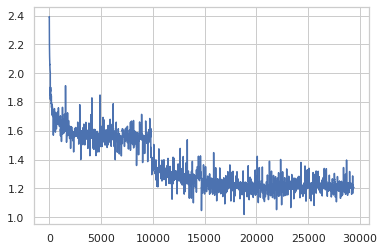

In [33]:
%matplotlib inline
plt.plot(loss['n4t'])